## L3 Code: Logistic Regression Implementation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression Using Sklearn

In [3]:
# This dataset describes grains of rice as on 7 input features, with 2 class outputs (Cammeo or Osmancik)
rice = pd.read_csv("Rice_Osmancik_Cammeo_Dataset.csv")
rice.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
# Is it class-balanced or unbalanced?
rice.CLASS.value_counts()

Osmancik    2180
Cammeo      1630
Name: CLASS, dtype: int64

In [5]:
# Split data, train logistic regression
X = rice.iloc[:,0:7].values
y = rice.CLASS.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

In [6]:
# Fit model, print coefficients
ricelr = LogisticRegression(penalty='none').fit(Xtrain,ytrain)

print(f"Intercept {ricelr.intercept_} \nCoefficients: {ricelr.coef_}")

Intercept [0.00318845] 
Coefficients: [[ 0.00608732  0.14475211 -0.24051264  0.39193589  0.00145249 -0.01007885
   0.003195  ]]


In [7]:
# Predict manually
sigmoid = lambda x: 1 / (1 + np.exp(-x))
y_pred_manual = sigmoid(np.dot(Xtest,ricelr.coef_.T) + ricelr.intercept_)
print(y_pred_manual)

[[9.65850686e-01]
 [3.10777332e-05]
 [4.75278589e-01]
 ...
 [1.79521950e-02]
 [8.47432156e-01]
 [1.86643411e-04]]


In [8]:
# Predict with sklearn. Note: probabilities of class 0 (first col), class 1 (2nd col)
ricelr.predict_proba(Xtest)

array([[3.41493136e-02, 9.65850686e-01],
       [9.99968922e-01, 3.10777332e-05],
       [5.24721411e-01, 4.75278589e-01],
       ...,
       [9.82047805e-01, 1.79521950e-02],
       [1.52567844e-01, 8.47432156e-01],
       [9.99813357e-01, 1.86643411e-04]])

In [9]:
# Get label predictions
y_pred = ricelr.predict(Xtest)
print(y_pred)

['Osmancik' 'Cammeo' 'Cammeo' ... 'Cammeo' 'Osmancik' 'Cammeo']


## Evaluation of Classifiers

In [10]:
def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
        
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

compute_performance(y_pred, ytest, ricelr.classes_)

tp: 1001 tn: 773 fp: 81 fn: 50
Accuracy: 0.931 Recall: 0.952 Precision: 0.925 Sensitivity: 0.952 Specificity: 0.905


In [11]:
# Now let's experiment by adjusting the decision threshold
ytest_prob = ricelr.predict_proba(Xtest)

yhat = ricelr.classes_[(ytest_prob[:,1]>0.1).astype(int)]

compute_performance(yhat, ytest, ricelr.classes_)

tp: 1040 tn: 613 fp: 241 fn: 11
Accuracy: 0.868 Recall: 0.99 Precision: 0.812 Sensitivity: 0.99 Specificity: 0.718


/Users/dongbochen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Osmancik' 'Cammeo' 'Osmancik' ... 'Cammeo' 'Osmancik' 'Cammeo']
[9.65850686e-01 3.10777332e-05 4.75278589e-01 ... 1.79521950e-02
 8.47432156e-01 1.86643411e-04]


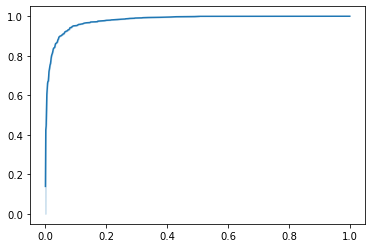

In [12]:
# ROC using sklearns ROC curve. 
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1], pos_label="Osmancik")
ax=sns.lineplot(fpr,tpr)

print(ytest)
print(ytest_prob[:,1])

In [13]:
# AUROC
auc(fpr,tpr)

0.9801115030404856

## Multiclass Logistic Regression

In [14]:
# Read data
iris = pd.read_csv("iris.csv")
iris.head()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Check out class distribution
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [16]:
# Create y and X. Not going to split these data for this demonstration.
y = iris.Species.values
X = iris.drop("Species", axis="columns")

In [17]:
# Fit the data using Sklearn's Logistic Regression
IRISLR = LogisticRegression(penalty='none',solver='newton-cg',C=0.01)
irislr = IRISLR.fit(X,y)
print(f"Intercepts: {irislr.intercept_} \nCoefficients: {irislr.coef_}")

#IRISLR = LogisticRegression(penalty='l2',solver='newton-cg',C=0.01)
#irislr = IRISLR.fit(X,y)
#print(f"Intercepts: {irislr.intercept_} \nCoefficients: {irislr.coef_}")

Intercepts: [  2.40206528  20.11790045 -22.51996573] 
Coefficients: [[  5.0138507    7.98482269 -13.25066708  -6.85014369]
 [ -1.27431571  -0.65196623   1.91063625  -5.71800243]
 [ -3.739535    -7.33285646  11.34003082  12.56814612]]


/Users/dongbochen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [18]:
# Get the predictions
yhat = irislr.predict(X)
yhat_probs = irislr.predict_proba(X)
yhat_probs

array([[1.00000000e+00, 9.00801004e-11, 1.39111881e-37],
       [9.99999976e-01, 2.37830161e-08, 1.69771741e-33],
       [9.99999997e-01, 3.26453360e-09, 3.90604899e-35],
       [9.99999699e-01, 3.01229613e-07, 5.92995641e-32],
       [1.00000000e+00, 7.12245120e-11, 7.21573511e-38],
       [1.00000000e+00, 5.11290608e-11, 1.70796601e-36],
       [9.99999994e-01, 5.55067876e-09, 3.57027559e-34],
       [9.99999998e-01, 1.82498153e-09, 1.80599993e-35],
       [9.99998691e-01, 1.30862537e-06, 6.24995300e-31],
       [9.99999959e-01, 4.07807035e-08, 6.15547923e-34],
       [1.00000000e+00, 1.10565378e-11, 5.50026768e-39],
       [9.99999971e-01, 2.92340303e-08, 1.21615122e-33],
       [9.99999960e-01, 3.98281607e-08, 5.84378857e-34],
       [9.99999990e-01, 9.77928581e-09, 2.90794870e-35],
       [1.00000000e+00, 7.08987732e-16, 1.04753514e-45],
       [1.00000000e+00, 4.97787588e-15, 4.26483706e-43],
       [1.00000000e+00, 1.18817296e-13, 9.13350480e-41],
       [1.00000000e+00, 1.00878

In [19]:
conf = confusion_matrix(yhat,y)


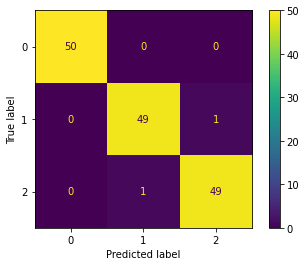

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(conf).plot()
plt.show()